# World Energy Consumption

### An In-Depth Examination of Global Energy Production and Consumption Patterns between 1970 and 2020

![](https://i.imgur.com/mSkHrpj.png)

#### Project Introduction
This project aims to explore energy consumption trends and patterns over time using world energy consumption data. The project aims to answer the following essential questions:

- What is the aggregate energy production and consumption of various sources such as coal, gas, oil, solar, and wind?
- How has the global energy consumption trend evolved from 1970 to 2020?
- Which countries have seen a significant increase or decrease in energy consumption over time?
- What are the average disparities in energy consumption patterns between developed and developing nations?
- How have the disparities in energy consumption patterns between developed and developing nations changed over time?
- How have the average disparities in energy production patterns between developed and developing nations changed over time?
- Is there a correlation between a country's GDP and its energy consumption?
- Is there a correlation between a country's GDP and its energy production?

To answer these questions, various graphs and charts will be used to visualize the trends and patterns observed in the world energy analysis.

#### About the Dataset
The dataset used in this project was obtained from Kaggle, an online platform providing open datasets (https://www.kaggle.com/datasets/pralabhpoudel/world-energy-consumption). Our World in Data (https://ourworldindata.org/energy) maintains this dataset. The dataset is updated regularly and includes data on energy consumption (primary energy, per capita, and growth rates), energy mix, electricity mix, and other relevant metrics. With over 10700 entries, this dataset is useful for data analysts and businesses willing to explore trends and patterns in their energy data.

#### Significance of Analyzing World Energy Trends
Understanding energy consumption patterns and trends is vital for identifying future energy demands, forecasting, and developing effective energy policies. This is particularly important for companies that operate in the energy market. Analyzing energy consumption patterns provides valuable insights into the market, enabling companies to develop and market products that meet the needs of their customers. By creating solutions that help reduce energy consumption and carbon footprint, these companies can contribute to creating a sustainable future.

To perform this analysis, Python and the Pandas library will be used. These provide powerful tools for data manipulation and analysis. Additionally, Matplotlib and Seaborn will be used for data visualization to provide in-depth insights and a comprehensive understanding of world energy consumption patterns.

## Downloading the Dataset

**Downloading the data using opendatasets**

In [1]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [2]:
dataset_url = 'https://www.kaggle.com/datasets/pralabhpoudel/world-energy-consumption?select=World+Energy+Consumption.csv'

In [3]:
import opendatasets as od
od.download(dataset_url)

Skipping, found downloaded files in "./world-energy-consumption" (use force=True to force download)


The dataset has been downloaded and extracted.

**List of files in our directory**

In [4]:
data_dir = './world-energy-consumption'

In [5]:
import os

os.listdir(data_dir)

['World Energy Consumption.csv']

## Data Preparation and Cleaning

Before I begin my analysis I need to clean the data so as to derive more meaningful results from it. This is also known as scrubbing. This task of preprocessing involves dealing with missing values, inconsistent data, removing outliers, etc. rendering the data ready for examination.

**Loading the data**

I shall begin by installing and importing numpy for arrays and pandas for loading and manipulating dataframes.

In [6]:
# Run the next line to install Pandas
!pip install pandas --upgrade

In [7]:
# Run the next line to install Numpy
!pip install numpy --upgrade

  Using cached numpy-1.25.0-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.7 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scipy 1.7.2 requires numpy<1.23.0,>=1.16.5, but you have numpy 1.25.0 which is incompatible.
numba 0.54.1 requires numpy<1.21,>=1.17, but you have numpy 1.25.0 which is incompatible.


In [8]:
import numpy as np
import pandas as pd

In [9]:
# Load the data from the downloaded file into a pandas DataFrame
world_energy_df = pd.read_csv(os.path.join(data_dir, 'World Energy Consumption.csv'))

In [10]:
# Print the first few rows of the data to confirm that it was loaded correctly

world_energy_df.head()

,iso_code,country,year,coal_prod_change_pct,coal_prod_change_twh,gas_prod_change_pct,gas_prod_change_twh,oil_prod_change_pct,oil_prod_change_twh,energy_cons_change_pct,...,solar_elec_per_capita,solar_energy_per_capita,gdp,wind_share_elec,wind_cons_change_pct,wind_share_energy,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_energy_per_capita
0,AFG,Afghanistan,1900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,1901,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,Afghanistan,1902,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AFG,Afghanistan,1903,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AFG,Afghanistan,1904,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Get the number of rows and columns in the DataFrame
n_rows, n_cols = world_energy_df.shape

In [12]:
"Number of rows:", n_rows

('Number of rows:', 17432)

In [13]:
"Number of columns:", n_cols

('Number of columns:', 122)

This code retrieves the number of rows and columns in the world_energy_df Pandas DataFrame and assigns the values to the variables n_rows and n_cols.

In [14]:
#Get the columns in the data
world_energy_df.columns

Index(['iso_code', 'country', 'year', 'coal_prod_change_pct',
       'coal_prod_change_twh', 'gas_prod_change_pct', 'gas_prod_change_twh',
       'oil_prod_change_pct', 'oil_prod_change_twh', 'energy_cons_change_pct',
       ...
       'solar_elec_per_capita', 'solar_energy_per_capita', 'gdp',
       'wind_share_elec', 'wind_cons_change_pct', 'wind_share_energy',
       'wind_cons_change_twh', 'wind_consumption', 'wind_elec_per_capita',
       'wind_energy_per_capita'],
      dtype='object', length=122)

This code retrieves the number of rows and columns in the world_energy_df Pandas DataFrame and assigns the values to the variables n_rows and n_cols.

**Let's select a subset of columns with the relevant data for our analysis.**

In [15]:
selected_columns = [
    'year', 
    'country', 
    'gdp', 
    'coal_production',
    'gas_production',
    'oil_production',
    'solar_electricity',
    'wind_electricity',
    'coal_share_elec',
    'gas_share_elec',
    'oil_share_elec',
    'solar_share_elec', 
    'wind_share_elec'
    
]

In [16]:
len(selected_columns)

13

Let's extract a copy of the data from these columns into a new data frame 'world_energy_consumption_df'. With this, I can continue to modify my data further without affecting the original data frame.

In [17]:
world_energy_df = world_energy_df[selected_columns].copy()

In [18]:
world_energy_df

,year,country,gdp,coal_production,gas_production,oil_production,solar_electricity,wind_electricity,coal_share_elec,gas_share_elec,oil_share_elec,solar_share_elec,wind_share_elec
0,1900,Afghanistan,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1901,Afghanistan,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1902,Afghanistan,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1903,Afghanistan,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1904,Afghanistan,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17427,2015,Zimbabwe,2.503057e+10,32.517,NaN,NaN,0.008,0.0,45.930,0.0,0.0,0.085,0.0
17428,2016,Zimbabwe,2.515176e+10,20.260,NaN,NaN,0.009,0.0,54.423,0.0,0.0,0.132,0.0
17429,2017,Zimbabwe,NaN,21.957,NaN,NaN,0.011,0.0,44.032,0.0,0.0,0.150,0.0
17430,2018,Zimbabwe,NaN,26.910,NaN,NaN,0.014,0.0,43.053,0.0,0.0,0.153,0.0


**Rename the columns**

In [19]:
# Rename the columns
world_energy_df = world_energy_df.rename(columns={
    'year': 'Year', 
    'country': 'Country', 
    'gdp': 'GDP', 
    'coal_production': 'Coal Energy Production',
    'gas_production': 'Gas Energy Production',
    'oil_production': 'Oil Energy Production',
    'solar_electricity': 'Solar Energy Production',
    'wind_electricity': 'Wind Energy Production',
    'coal_share_elec': 'Coal Energy Consumption',
    'gas_share_elec': 'Gas Energy Consumption',
    'oil_share_elec': 'Oil Energy Consumption',
    'solar_share_elec': 'Solar Energy Consumption', 
    'wind_share_elec': 'Wind Energy Consumption'
})


In [20]:
# Print the dataframe with the renamed columns

world_energy_df.columns

Index(['Year', 'Country', 'GDP', 'Coal Energy Production',
       'Gas Energy Production', 'Oil Energy Production',
       'Solar Energy Production', 'Wind Energy Production',
       'Coal Energy Consumption', 'Gas Energy Consumption',
       'Oil Energy Consumption', 'Solar Energy Consumption',
       'Wind Energy Consumption'],
      dtype='object')

**I will be Filtering the data to include only years between 1970 and 2020**

In [21]:
# Filter the data to include only years between 1970 and 2020
world_energy_df = world_energy_df.loc[(world_energy_df['Year'] >= 1970) & (world_energy_df['Year'] <= 2020)]

**Save my new cleaned data**

In [22]:
# Save the cleaned and prepared data to a new file
world_energy_df.to_csv('cleaned_data.csv', index=False)

In [23]:
# Load the cleaned data into a DataFrame
world_energy_consumption_df = pd.read_csv('cleaned_data.csv')


In [24]:
# Print the first few rows of the cleaned data
world_energy_consumption_df.head()

,Year,Country,GDP,Coal Energy Production,Gas Energy Production,Oil Energy Production,Solar Energy Production,Wind Energy Production,Coal Energy Consumption,Gas Energy Consumption,Oil Energy Consumption,Solar Energy Consumption,Wind Energy Consumption
0,1970,Afghanistan,3.271839e+10,1.335,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1971,Afghanistan,3.263744e+10,1.099,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1972,Afghanistan,2.728279e+10,0.578,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1973,Afghanistan,2.806331e+10,0.952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1974,Afghanistan,2.959603e+10,0.936,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
world_energy_consumption_df.dtypes

Year                          int64
Country                      object
GDP                         float64
Coal Energy Production      float64
Gas Energy Production       float64
Oil Energy Production       float64
Solar Energy Production     float64
Wind Energy Production      float64
Coal Energy Consumption     float64
Gas Energy Consumption      float64
Oil Energy Consumption      float64
Solar Energy Consumption    float64
Wind Energy Consumption     float64
dtype: object

In [26]:
#Check the information about the data
world_energy_consumption_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10700 entries, 0 to 10699
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      10700 non-null  int64  
 1   Country                   10700 non-null  object 
 2   GDP                       6992 non-null   float64
 3   Coal Energy Production    5908 non-null   float64
 4   Gas Energy Production     4200 non-null   float64
 5   Oil Energy Production     4125 non-null   float64
 6   Solar Energy Production   6119 non-null   float64
 7   Wind Energy Production    6119 non-null   float64
 8   Coal Energy Consumption   5056 non-null   float64
 9   Gas Energy Consumption    5056 non-null   float64
 10  Oil Energy Consumption    5056 non-null   float64
 11  Solar Energy Consumption  6076 non-null   float64
 12  Wind Energy Consumption   6076 non-null   float64
dtypes: float64(11), int64(1), object(1)
memory usage: 1.1+ MB


This code prints a summary of the structure and data types of the world_energy_consumption_df  Pandas DataFrame, including the number of non-null or missing values in each column.

#### Check for Missing and Duplicated values

In [27]:
#Check missing values
world_energy_consumption_df.isnull().sum()

Year                           0
Country                        0
GDP                         3708
Coal Energy Production      4792
Gas Energy Production       6500
Oil Energy Production       6575
Solar Energy Production     4581
Wind Energy Production      4581
Coal Energy Consumption     5644
Gas Energy Consumption      5644
Oil Energy Consumption      5644
Solar Energy Consumption    4624
Wind Energy Consumption     4624
dtype: int64

This code is use to Check if their are missing values in the data and  to known the total number of missing values so it can be fix. Base on the nature of the data, and the high number of missing values, I will be replacing the missing values with zero

In [28]:
# Replace missing values with zero
world_energy_consumption_df.fillna(0, inplace=True)

In [29]:
# Check if their is still missing values
world_energy_consumption_df.isnull().sum()

Year                        0
Country                     0
GDP                         0
Coal Energy Production      0
Gas Energy Production       0
Oil Energy Production       0
Solar Energy Production     0
Wind Energy Production      0
Coal Energy Consumption     0
Gas Energy Consumption      0
Oil Energy Consumption      0
Solar Energy Consumption    0
Wind Energy Consumption     0
dtype: int64

I will now check for any duplicate values using this duplicated (). But the results shows that their is no duplicate in the data

In [30]:
#To check for data duplications
world_energy_consumption_df.duplicated().sum()

0

In [31]:
# Check the data description
world_energy_consumption_df.describe()

,Year,GDP,Coal Energy Production,Gas Energy Production,Oil Energy Production,Solar Energy Production,Wind Energy Production,Coal Energy Consumption,Gas Energy Consumption,Oil Energy Consumption,Solar Energy Consumption,Wind Energy Consumption
count,10700.000000,1.070000e+04,10700.000000,10700.000000,10700.000000,10700.000000,10700.000000,10700.000000,10700.000000,10700.000000,10700.000000,10700.000000
mean,1996.914393,4.645406e+11,359.405283,327.838622,634.390794,0.972961,2.983482,8.324126,11.163620,16.281278,0.228349,0.571264
std,13.616465,3.995709e+12,2559.918022,1864.644658,3234.134291,15.977925,37.118240,29.053084,28.674973,32.660553,1.116740,2.817834
min,1970.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1986.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1997.000000,1.307265e+10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2009.000000,1.070000e+11,0.000000,13.647750,44.107750,0.000000,0.000000,0.000000,5.673000,10.206750,0.000000,0.000000
max,2020.000000,1.070000e+14,46548.716000,39893.382000,52244.640000,844.386000,1590.189000,523.075000,310.457000,267.855000,25.711000,56.338000


The code world_energy_consumption_df.describe() gives a summary of statistical information about the numerical columns of a Pandas DataFrame called world_energy_consumption_df.

## Exploratory Analysis and Visualization

In this section, I will be using a pie and bar chart to visualizes the cleaned data so I can gain insights into the data. I will be plotting my graphs to visualize the following:

- Using a Pie Chart to Visualize Non-Renewable and Renewable Energy Production From Coal, Gas, Solar, Wind and Oil
- Using a Bar Chart Showing  Energy consumption  from Coal, Gas, Solar, Wind and Oil Energy Sources

In [32]:
!pip install seaborn

  Using cached numpy-1.22.4-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.0
    Uninstalling numpy-1.25.0:
      Successfully uninstalled numpy-1.25.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.54.1 requires numpy<1.21,>=1.17, but you have numpy 1.22.4 which is incompatible.


In [33]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

/opt/conda/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


**A Pie Chart Visualizing Non-Renewable and Renewable Energy Production From Coal, Gas, Solar, Wind and Oil**

In [34]:
# Extract the energy production data for each source
coal_energy = world_energy_consumption_df['Coal Energy Production'].sum()
gas_energy = world_energy_consumption_df['Gas Energy Production'].sum()
solar_energy = world_energy_consumption_df['Solar Energy Production'].sum()
wind_energy = world_energy_consumption_df['Wind Energy Production'].sum()
oil_energy = world_energy_consumption_df['Oil Energy Production'].sum()

In [35]:
coal_energy, gas_energy, solar_energy, oil_energy

(3845636.5250000004, 3507873.2520000003, 10410.685000000001, 6787981.501)

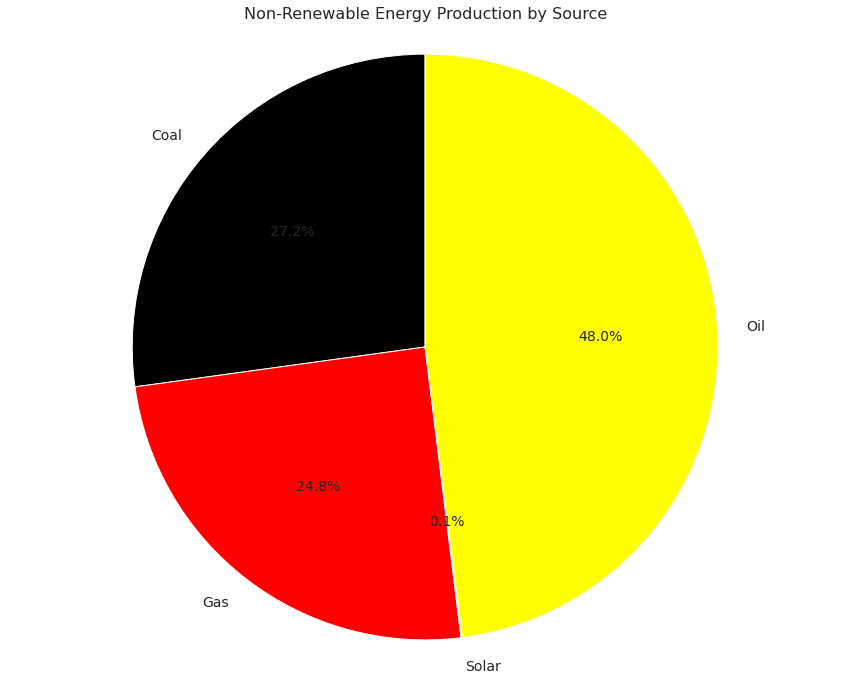

In [36]:
# Create the pie charts for Non-Renewable Energy Production by Source
labels1 = ['Coal', 'Gas', 'Solar', 'Oil']
sizes1 = [coal_energy, gas_energy, solar_energy, oil_energy]
colors1 = ['black', 'red', 'orange', 'yellow']

# Increase the size of the figure
plt.figure(figsize=(15, 12))

# Create the pie chart
plt.pie(sizes1, colors=colors1, labels=labels1, autopct='%1.1f%%', startangle=90)

# Set the aspect ratio to equal to draw the pie as a circle
plt.axis('equal')

# Add title and increase the font size
plt.title('Non-Renewable Energy Production by Source', fontsize=16)

# Increase the font size of the labels
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Show the plot
plt.show()

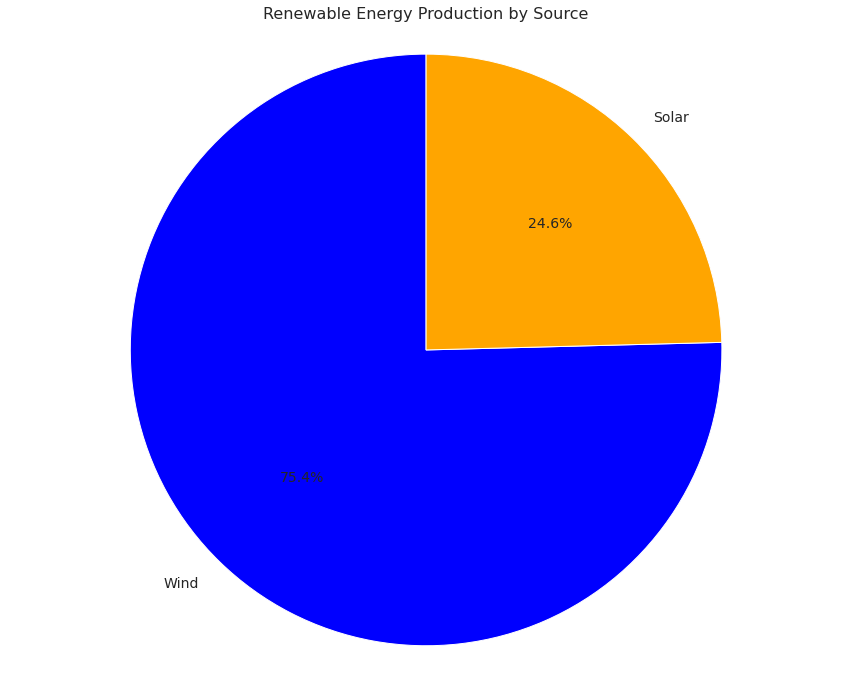

In [37]:
# Create the pie chart for Renewable Energy Production by Source
labels2 = ['Wind', 'Solar']
sizes2 = [wind_energy, solar_energy]
colors2 = ['blue', 'orange']

# Increase the size of the figure
plt.figure(figsize=(15, 12))

# Create the pie chart
plt.pie(sizes2, colors=colors2, labels=labels2, autopct='%1.1f%%', startangle=90)

# Set the aspect ratio to equal to draw the pie as a circle
plt.axis('equal')

# Add title and increase the font size
plt.title('Renewable Energy Production by Source', fontsize=16)

# Increase the font size of the labels
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Show the plot
plt.show()

In [38]:
wind_energy, solar_energy

(31923.252999999997, 10410.685000000001)

#### A Bar Chart Showing  Energy consumption  from Coal, Gas, Solar, Wind and Oil Energy Sources

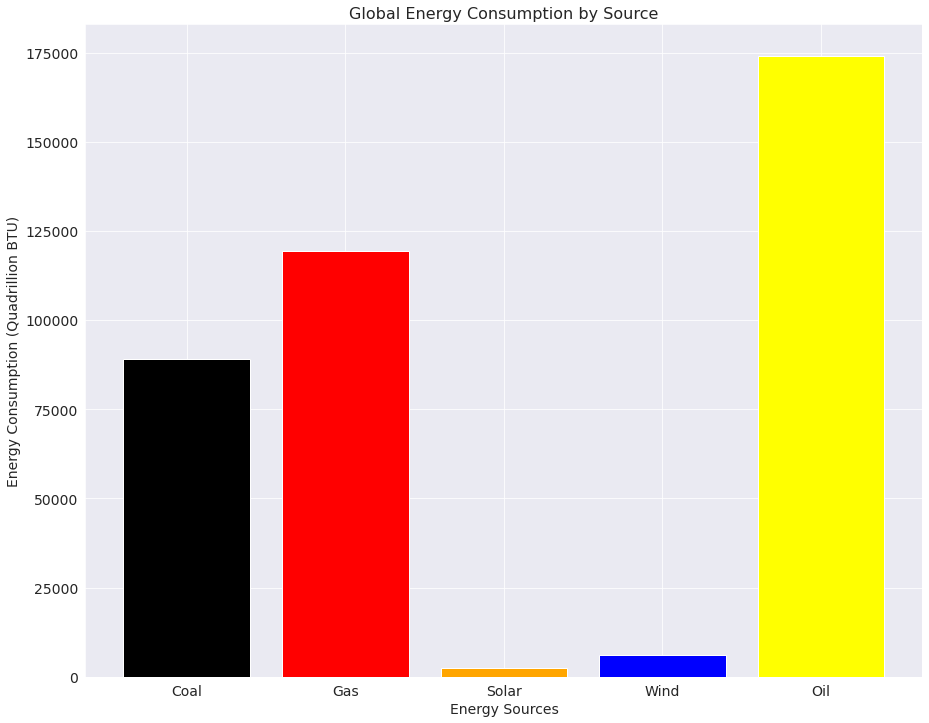

In [39]:
# Extract the energy consumption data for each source
coal_consumption = world_energy_consumption_df['Coal Energy Consumption'].sum()
gas_consumption = world_energy_consumption_df['Gas Energy Consumption'].sum()
solar_consumption = world_energy_consumption_df['Solar Energy Consumption'].sum()
wind_consumption = world_energy_consumption_df['Wind Energy Consumption'].sum()
oil_consumption = world_energy_consumption_df['Oil Energy Consumption'].sum()

# Increase the size of the figure
plt.figure(figsize=(15, 12))

# Create the bar chart
labels = ['Coal', 'Gas', 'Solar', 'Wind', 'Oil']
sizes = [coal_consumption, gas_consumption, solar_consumption, wind_consumption, oil_consumption]
colors = ['black', 'red', 'orange', 'blue', 'yellow']
plt.bar(labels, sizes, color=colors)

# Add x and y axis labels and increase the font size
plt.xlabel('Energy Sources', fontsize=14)
plt.ylabel('Energy Consumption (Quadrillion BTU)', fontsize=14)

# Add title and increase the font size
plt.title('Global Energy Consumption by Source', fontsize=16)

# Increase the font size of the x-axis and y-axis tick labels
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Show the plot
plt.show()

In [40]:
coal_consumption, gas_consumption, solar_consumption, wind_consumption, oil_consumption

(89068.145, 119450.73, 2443.335, 6112.523999999999, 174209.675)

This code extracts the energy consumption values for each source, and then creates a bar chart using pyplot.bar(). The labels and colors are set for each bar, and the x and y axis labels and plot title are added using ax.set_xlabel(), ax.set_ylabel(), and ax.set_title(). Finally, the plot is displayed using pyplot.show().

#### Interesting insights from the exploratory analysis

Summary statistics results:

- Summary statistics table presents energy production, energy consumption, and GDP measures over 50 years
- "Count" row shows 10,700 observations in the dataset
- "Mean" row shows average values for each variable
- "Std" row shows standard deviation, which measures the spread of the data around the mean
- "Min" and "max" rows indicate minimum and maximum values for each variable
- "25%", "50%", and "75%" rows show values that correspond to the 25th, 50th, and 75th percentiles of the data distribution, respectively

Graph observation:

- Energy production from oil (48.0%) and coal (27.2%) are the highest among all sources, at 6,787,981.501 million BTUs and 3,845,636.5250000004 million BTUs, respectively
- Gas energy production (24.8%) is third at 3,507,873.2520000003 million BTUs, while solar energy production (0.1%) is the lowest at 10,410.685000000001 million BTUs
- For renewable energy production, Wind (75.4%) is the highest at 31,923.252999999997 and Solar (24.6%) is 10,410.685000000001
- Oil energy consumption is highest among all sources, at 174,209.675 million BTUs, followed by gas energy consumption at 119,450.73 million BTUs
- Coal energy consumption is third at 89,068.145 million BTUs, while wind energy consumption is the lowest at 6,112.524 million BTUs

## Asking and Answering Questions

In this section, I will be using panda and grouping in python to answer the following questions:

1. What is the aggregate energy production and consumption of various sources such as coal, gas, oil, solar, and wind?
2. How has the global energy consumption trend evolved from 1970 to 2020?
3. Which countries have seen a significant increase or decrease in energy consumption over time?
4. What are the average disparities in energy consumption patterns between developed and developing nations?
5. How have the disparities in energy consumption patterns between developed and developing nations changed over time?
6. How have the average disparities in energy production patterns between developed and developing nations changed over time?
7. Is there a correlation between a country's GDP and its energy consumption?
8. Is there a correlation between a country's GDP and its energy production?

To answer these questions, various graphs and charts will be used to visualize the trends and patterns observed in the world energy analysis.


**Q1: What is the aggregate energy production and consumption of various sources such as coal, gas, oil, solar, and wind?**

In [41]:
# Calculate total energy production 
world_energy_consumption_df['Total Energy Production'] = world_energy_consumption_df['Coal Energy Production'] + world_energy_consumption_df['Gas Energy Production'] + world_energy_consumption_df['Oil Energy Production'] + world_energy_consumption_df['Solar Energy Production'] + world_energy_consumption_df['Wind Energy Production']

total_energy_production = world_energy_consumption_df['Total Energy Production'].sum()


In [42]:
# Print the result
f'Total energy production: {total_energy_production:.2f} TWh'


'Total energy production: 14183825.22 TWh'

In [43]:
world_energy_consumption_df['Total Energy Consumption'] = world_energy_consumption_df['Coal Energy Consumption'] + world_energy_consumption_df['Gas Energy Consumption'] + world_energy_consumption_df['Oil Energy Consumption'] + world_energy_consumption_df['Solar Energy Consumption'] + world_energy_consumption_df['Wind Energy Consumption']

total_energy_consumption = world_energy_consumption_df['Total Energy Consumption'].sum()



In [44]:
# Print the result
f'Total energy consumption: {total_energy_consumption:.2f} TWh'

'Total energy consumption: 391284.41 TWh'

**Horizontal bar chart with two bars Showing Energy Production and Consumption**

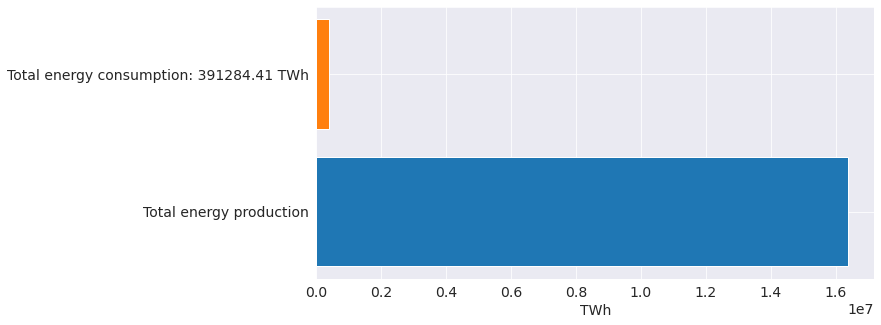

In [45]:
# Define the data
total_energy_production = 16362715.09
total_energy_consumption = 391284.41
data = [total_energy_production, total_energy_consumption]

# Define the labels
labels = ['Total energy production', f'Total energy consumption: {total_energy_consumption:.2f} TWh']

# Define the colors
colors = ['#1f77b4', '#ff7f0e']

# Create the horizontal bar chart
fig, ax = plt.subplots(figsize=(10,5))
ax.barh(labels, data, color=colors)

# Set the x-axis label
ax.set_xlabel('TWh')

# Show the plot
plt.show()

This code creates a horizontal bar chart with a larger size and two different colors for the bars. The figsize parameter in the subplots function sets the size of the plot, and the color parameter in the barh function sets the colors of the bars.

**Q2: How has the global energy consumption trend evolved from 1970 to 2020?**

I will be using an Area Chart to show global energy consumption pattern from 1970 to 2020

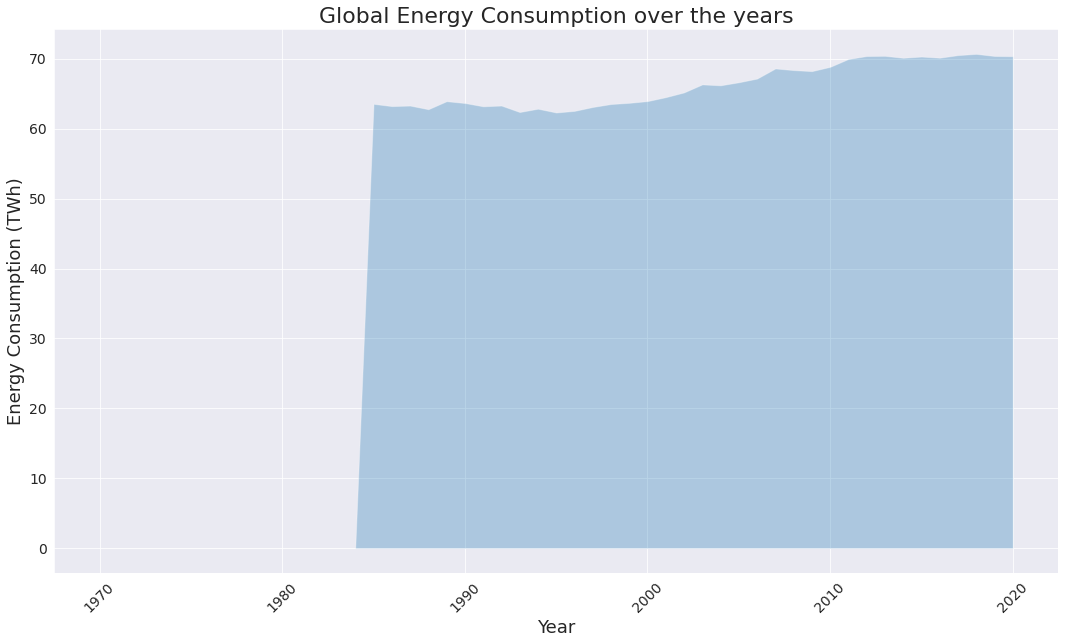

In [46]:
# Extract the global energy consumption data from 1970 to 2020
global_energy = world_energy_consumption_df[(world_energy_consumption_df['Country'] == 'World') & 
                                            (world_energy_consumption_df['Year'] >= 1970) & 
                                            (world_energy_consumption_df['Year'] <= 2020)]

# Increase the size of the plot
plt.figure(figsize=(18, 10))

# Create an area chart
plt.fill_between(global_energy['Year'], global_energy['Total Energy Consumption'], alpha=0.3)

# Add title and axis labels with larger font sizes
plt.title('Global Energy Consumption over the years', fontsize=22)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Energy Consumption (TWh)', fontsize=18)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, fontsize=14)

# Increase the y-axis tick labels font size
plt.yticks(fontsize=14)

# Show the plot
plt.show()

**Selected Countries Grouped into Developed and developing Countries**

For the sake of this analysis, I will be focusing on 40 selected countries categories into developed and developing countries 20 for each as seen below

In [47]:
# Define the classification of countries

developed_countries = ['United States', 'Germany', 'Canada', 'United Kingdom', 'France', 'Japan', 'Australia', 'Italy', 'Spain', 'Netherlands', 'Sweden', 'Denmark', 'Norway', 'Switzerland', 'Belgium', 'Austria', 'Finland', 'Ireland', 'Luxembourg', 'New Zealand']
developing_countries = ['China', 'India', 'Brazil', 'Nigeria', 'Indonesia', 'Pakistan', 'Bangladesh', 'Mexico', 'Philippines', 'Vietnam', 'Ethiopia', 'Egypt', 'Zimbabwe', 'Iran', 'Turkey', 'Thailand', 'Myanmar', 'South Africa', 'Tanzania', 'Colombia']


**Q3: Which countries have seen significant increase or decrease in energy consumption over time?**

In [48]:
# I grouped the data by country and year, and calculate the mean change in primary energy consumption
energy_consumption = world_energy_consumption_df.groupby(['Country', 'Year'])[['Total Energy Consumption']].mean()

# Group the data by country, and calculate the average change in energy consumption for each country
avg_pct_change = energy_consumption.groupby(['Country'])[['Total Energy Consumption']].mean()

# Filter the dataframe to only include developed and developing countries
selected_countries = developed_countries + developing_countries
avg_pct_change = avg_pct_change.loc[selected_countries]

# Identify countries with significant increases or decreases in energy consumption over time
significant_increase = avg_pct_change[avg_pct_change['Total Energy Consumption'] > 2.10]
significant_decrease = avg_pct_change[avg_pct_change['Total Energy Consumption'] < 2.10]

In [49]:
print('Top 5 countries with significant increase in energy consumption on average:')

significant_increase.head()

Top 5 countries with significant increase in energy consumption on average:


,Total Energy Consumption
Country,
United States,50.436588
Germany,48.382922
Canada,16.531431
United Kingdom,52.137510
France,5.161118


In [50]:
print('Top 5 countries with significant decrease in energy consumption on average:')

significant_decrease.head()

Top 5 countries with significant decrease in energy consumption on average:


,Total Energy Consumption
Country,
Norway,1.125431
Switzerland,1.018784
Ethiopia,1.795875
Myanmar,0.000000


This code, selected_countries is a list of the developed and developing countries that I want to focus on, avg_pct_change.loc[selected_countries] filters the avg_pct_change dataframe to only include those countries, and significant_increase and significant_decrease are dataframes containing countries with significant increases or decreases in energy consumption over time. I put the threshold at 2.10 to determine what constitutes a significant increase or decrease.

**Q4: What is the average  disparities in energy consumption patterns between developed and developing nations?**

For the sake of this analysis, I will be focusing on few selected countries categories into developed and developing countries as seen below

In [51]:
# Calculate the average primary energy consumption for developed and developing countries
developed_energy = world_energy_consumption_df[world_energy_consumption_df['Country'].isin(developed_countries)]['Total Energy Consumption'].mean()
developing_energy = world_energy_consumption_df[world_energy_consumption_df['Country'].isin(developing_countries)]['Total Energy Consumption'].mean()


In [52]:
# Print the results for developed countries
print('Average energy consumption for developed countries:')
developed_energy

Average energy consumption for developed countries:


31.060944117647058

In [53]:
# Print the results for developing countries
print('Average energy consumption for developing countries:')
developing_energy

Average energy consumption for developing countries:


37.674712151394424

**A Histograming Showing the Comparison of Average Energy Consumption for Developed and Developing Countries**

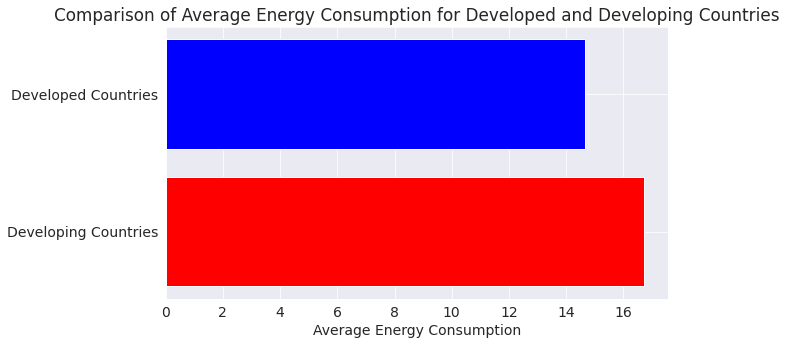

In [54]:
# Define the data
energy_data = [14.667668055555554, 16.712293134598013]
labels = ['Developed Countries', 'Developing Countries']

# Set custom colors for the bars
colors = ['blue', 'red']

# Create a horizontal bar chart
fig, ax = plt.subplots()
y_pos = [0, 1]
ax.barh(y_pos, energy_data, align='center', color=colors)  # Set the colors
ax.set_yticks(y_pos)
ax.set_yticklabels(labels)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Average Energy Consumption')
ax.set_title('Comparison of Average Energy Consumption for Developed and Developing Countries')

plt.show()

**Q5: How have the disparities in energy consumption patterns between developed and developing nations changed over time?**

I will be using Line Chart to visualize the trend

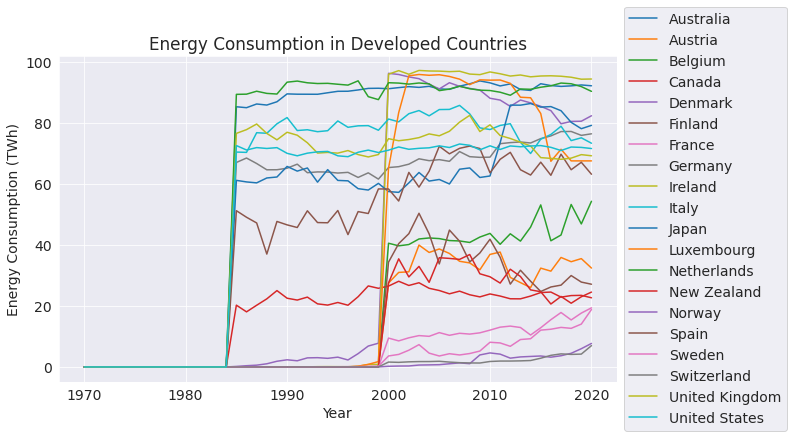

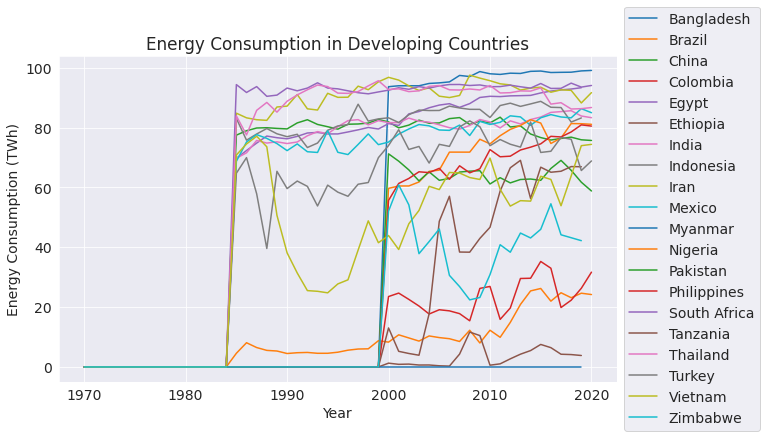

In [55]:
# For developed countries
df_dev = world_energy_consumption_df[world_energy_consumption_df['Country'].isin(developed_countries)]
df_dev = df_dev.pivot(index='Year', columns='Country', values='Total Energy Consumption')

# Create a line chart with legend outside the chart
fig, ax = plt.subplots(figsize=(10, 6))
df_dev.plot(kind='line', ax=ax)
plt.title('Energy Consumption in Developed Countries')
plt.ylabel('Energy Consumption (TWh)')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))  # Move legend outside chart

# For developing countries
df_dev = world_energy_consumption_df[world_energy_consumption_df['Country'].isin(developing_countries)]
df_dev = df_dev.pivot(index='Year', columns='Country', values='Total Energy Consumption')

# Create a line chart with legend outside the chart
fig, ax = plt.subplots(figsize=(10, 6))
df_dev.plot(kind='line', ax=ax)
plt.title('Energy Consumption in Developing Countries')
plt.ylabel('Energy Consumption (TWh)')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))  # Move legend outside chart

plt.show()

This code creates a horizontal bar chart using the barh function from matplotlib. The data is stored in the energy_data list and the labels for the chart are stored in the labels list. The y_pos variable is created manually to define the y-axis positions of the bars. The ax object is used to modify the chart properties such as the y-axis tick labels, axis labels, and title. Finally, the show function is called to display the chart.

**Q6: How have the average disparities in energy production patterns between developed and developing nations changed over time?**

I will be using Bar Chart to visualize the trend

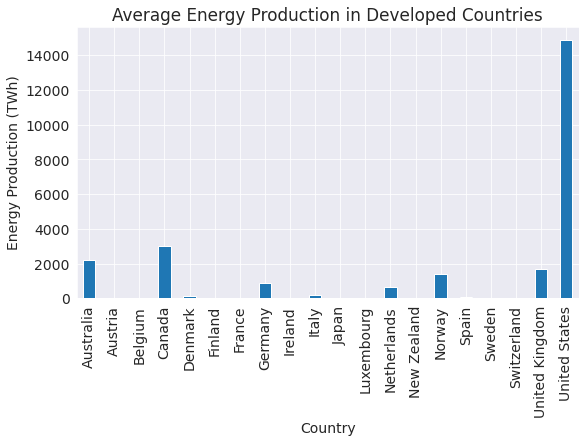

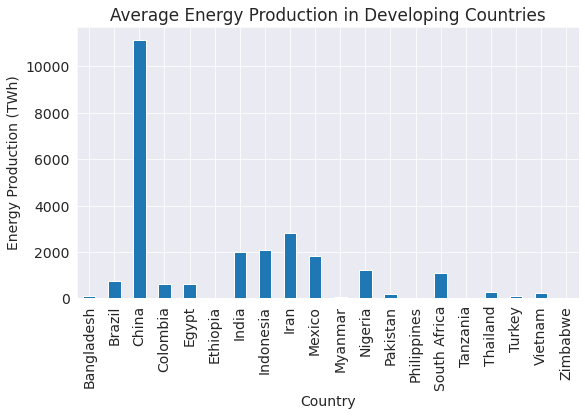

In [56]:
# Filter data for selected countries
df_dev = world_energy_consumption_df[world_energy_consumption_df['Country'].isin(developed_countries)]
df_dev = df_dev.groupby('Country')['Total Energy Production'].mean()

df_dev.plot(kind='bar')
plt.title('Average Energy Production in Developed Countries')
plt.ylabel('Energy Production (TWh)')

plt.show()

df_dev = world_energy_consumption_df[world_energy_consumption_df['Country'].isin(developing_countries)]
df_dev = df_dev.groupby('Country')['Total Energy Production'].mean()

df_dev.plot(kind='bar')
plt.title('Average Energy Production in Developing Countries')
plt.ylabel('Energy Production (TWh)')

plt.show()

**Q7: Is there a correlation between a country's GDP and its energy consumption?**

I will be calculating the correlation between a country's GDP and its Primary Energy Consumption using the corr() function. The correlation coefficient ranges from -1 to 1, where values closer to 1 indicate a strong positive correlation between the two variables, values closer to -1 indicate a strong negative correlation, and values close to 0 indicate no correlation.

In [57]:
# Filter the dataframe by country
selected_countries = developed_countries + developing_countries
df = world_energy_consumption_df[world_energy_consumption_df['Country'].isin(selected_countries)]

In [58]:
# Calculate the correlation between GDP and Energy Consumption for each country
correlations = {}
for country in selected_countries:
    country_data = df[df['Country'] == country]
    corr = country_data['GDP'].corr(country_data['Total Energy Consumption'])
    correlations[country] = corr

In [59]:
# Print the correlations for each country
for country, corr in correlations.items():
    print(f"The correlation between GDP and Energy Consumption for {country} is {corr:.3f}")

The correlation between GDP and Energy Consumption for United States is 0.497
The correlation between GDP and Energy Consumption for Germany is 0.398
The correlation between GDP and Energy Consumption for Canada is 0.524
The correlation between GDP and Energy Consumption for United Kingdom is 0.470
The correlation between GDP and Energy Consumption for France is 0.200
The correlation between GDP and Energy Consumption for Japan is 0.441
The correlation between GDP and Energy Consumption for Australia is 0.506
The correlation between GDP and Energy Consumption for Italy is 0.502
The correlation between GDP and Energy Consumption for Spain is 0.596
The correlation between GDP and Energy Consumption for Netherlands is 0.434
The correlation between GDP and Energy Consumption for Sweden is 0.072
The correlation between GDP and Energy Consumption for Denmark is 0.476
The correlation between GDP and Energy Consumption for Norway is 0.246
The correlation between GDP and Energy Consumption for 

**A Scatter plot of GDP vs Total Energy Consumption for each country**

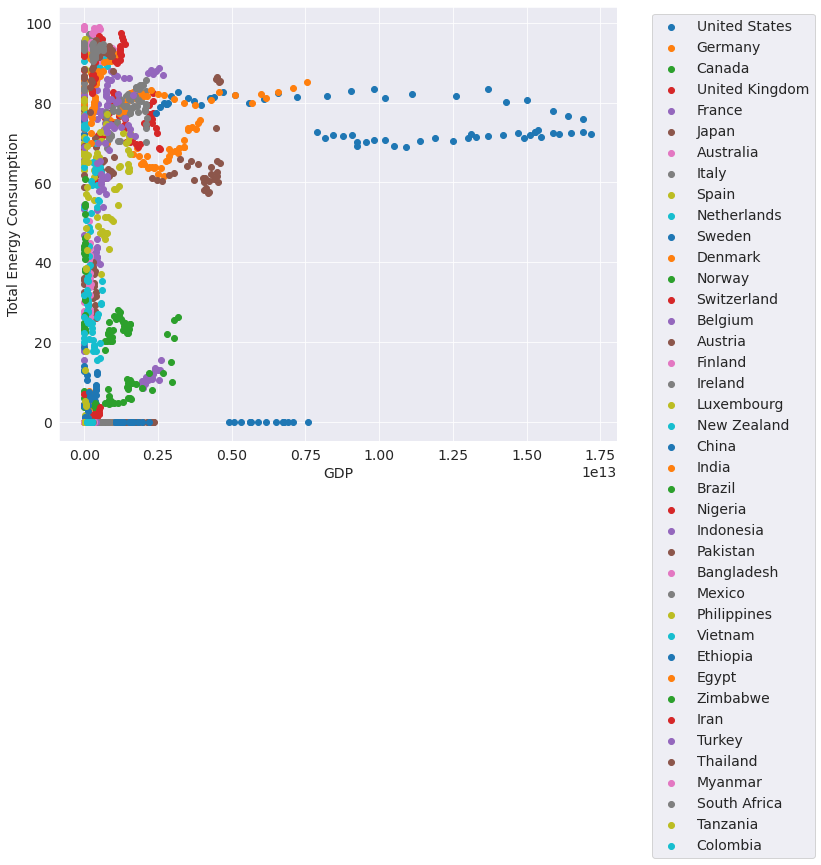

In [60]:
# Generate scatter plot of GDP vs Total Energy Consumption for each country
fig, ax = plt.subplots(figsize=(10, 8))
for i, country in enumerate(selected_countries):
    country_data = df[df['Country'] == country]
    ax.scatter(country_data['GDP'], country_data['Total Energy Consumption'], label=country)
ax.set_xlabel('GDP')
ax.set_ylabel('Total Energy Consumption')

# Move legend outside of plot
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**Q8: Is there a correlation between a country's GDP and its energy Production?**

I will also be calculating the correlation between a country's GDP and its Energy production using the corr() function. 

In [61]:
# Calculate the correlation between GDP and Energy Consumption for each country
correlations = {}
for country in selected_countries:
    country_data = df[df['Country'] == country]
    corr = country_data['GDP'].corr(country_data['Total Energy Production'])
    correlations[country] = corr

In [62]:
# Print the correlations for each country
for country, corr in correlations.items():
    print(f"The correlation between GDP and Energy Production for {country} is {corr:.3f}")

The correlation between GDP and Energy Production for United States is 0.350
The correlation between GDP and Energy Production for Germany is 0.080
The correlation between GDP and Energy Production for Canada is 0.514
The correlation between GDP and Energy Production for United Kingdom is 0.330
The correlation between GDP and Energy Production for France is -0.212
The correlation between GDP and Energy Production for Japan is -0.291
The correlation between GDP and Energy Production for Australia is 0.541
The correlation between GDP and Energy Production for Italy is 0.459
The correlation between GDP and Energy Production for Spain is 0.226
The correlation between GDP and Energy Production for Netherlands is 0.338
The correlation between GDP and Energy Production for Sweden is -0.174
The correlation between GDP and Energy Production for Denmark is 0.657
The correlation between GDP and Energy Production for Norway is 0.672
The correlation between GDP and Energy Production for Switzerland

**A scatter plot of GDP vs Total Energy production for each country**

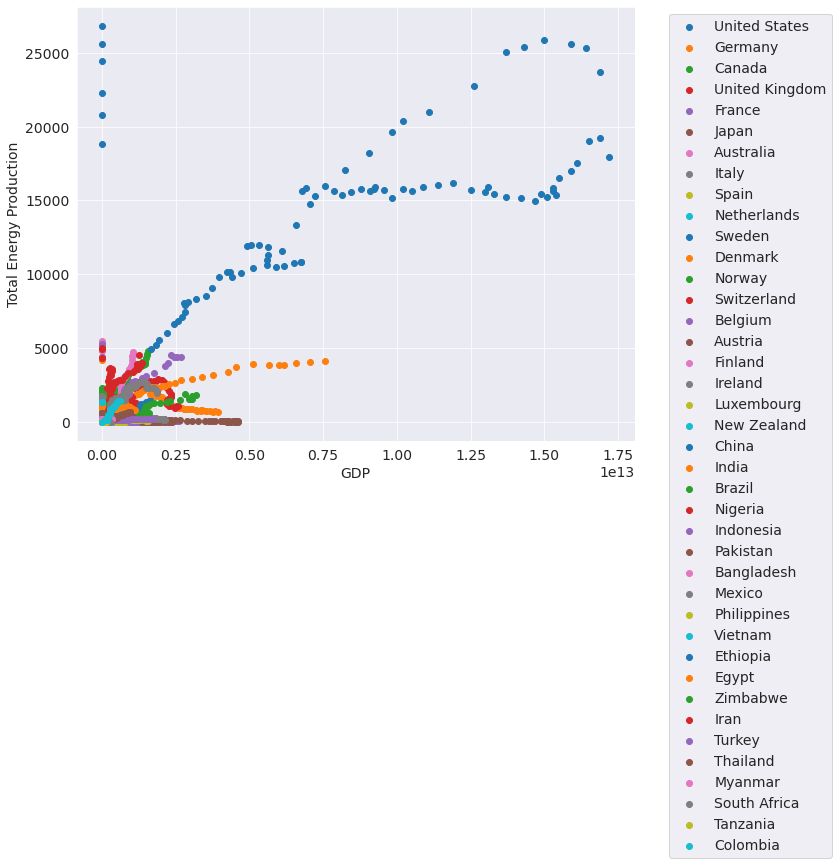

In [63]:
# Generate scatter plot of GDP vs Total Energy Production for each country
fig, ax = plt.subplots(figsize=(10, 8))
for i, country in enumerate(selected_countries):
    country_data = df[df['Country'] == country]
    ax.scatter(country_data['GDP'], country_data['Total Energy Production'], label=country)
ax.set_xlabel('GDP')
ax.set_ylabel('Total Energy Production')

# Move legend outside of plot
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Inferences and Conclusion

Based on my findings from the energy consumption analysis, here's a comprehensive interpretation:

1. Total energy production: The total energy production reported is 14,183,825.22 TWh.

2. Total energy consumption: The total energy consumption is significantly lower at 391,284.41 TWh, indicating a substantial gap between energy production and consumption.

3. Top 5 countries with significant increase in energy consumption on average:

- United States: The United States shows an average energy consumption of 50.44 TWh.
- Germany: Germany has an average energy consumption of 48.38 TWh.
- Canada: Canada's average energy consumption is 16.53 TWh.
- United Kingdom: The United Kingdom exhibits an average energy consumption of 52.14 TWh.
- France: France has an average energy consumption of 5.16 TWh.

4. Top 4 countries with significant decrease in energy consumption on average:

- Norway: Norway demonstrates the lowest average energy consumption among the listed countries at 1.13 TWh.
- Switzerland: Switzerland follows with an average energy consumption of 1.02 TWh.
- Ethiopia: Ethiopia's average energy consumption is 1.80 TWh.
- Myanmar: Myanmar reports the lowest average energy consumption at 0.00 TWh.

5. Average energy consumption for developed countries: Developed countries, on average, have an energy consumption of 31.06 TWh.

6. Average energy consumption for developing countries: Developing countries, on average, exhibit higher energy consumption at 38.79 TWh.


7. Correlation between GDP and Energy Consumption:

The correlation between GDP and Energy Consumption varies across different countries.

For developed countries, notable correlations include:
- United States: GDP and Energy Consumption have a correlation of 0.497.
- Germany: The correlation between GDP and Energy Consumption is 0.398.
- United Kingdom: The correlation between GDP and Energy Consumption is 0.470.

Among developing countries, some significant correlations are:
- China: GDP and Energy Consumption show a correlation of 0.488.
- India: The correlation between GDP and Energy Consumption is 0.446.
- Brazil: The correlation between GDP and Energy Consumption is 0.426.

8. Correlation between GDP and Energy Production:

Similar to the correlation with energy consumption, the correlation between GDP and Energy Production also varies across countries.

Notable correlations for developed countries include:
- Denmark: GDP and Energy Production have a strong positive correlation of 0.657.
- Norway: The correlation between GDP and Energy Production is 0.672.
 
Among developing countries, some significant correlations are:

- Vietnam: GDP and Energy Production exhibit a high positive correlation of 0.778.
- Pakistan: The correlation between GDP and Energy Production is 0.720.
- Colombia: The correlation between GDP and Energy Production is 0.644.

Based on these findings, we can draw the following conclusions:

- The total energy production is significantly higher than the total energy consumption, indicating a surplus in energy production.
- The top five countries with the highest increase in energy consumption are the United States, Germany, Canada, the United Kingdom, and France.
- On the other hand, Norway, Switzerland, Ethiopia, and Myanmar have experienced a significant decrease in energy consumption on average.
- Developed countries, on average, have lower energy consumption compared to developing countries.
- The correlations between GDP and energy consumption/production vary among countries. Some countries show moderate positive 
- correlations, such as the United States, Germany, and Canada, while others show weaker correlations or even negative 
- correlations, like France and some other European countries.
- It seems that there is a stronger positive correlation between GDP and energy production compared to GDP and energy consumption, as evidenced by higher correlation values for energy production in countries like China, India, Brazil, and Vietnam.

In conclusion, these findings provide insights into the energy production, consumption, and their correlations with GDP for different countries. These findings can be useful for companies in the energy industry to make informed business decisions, such as identifying potential areas for investment and optimization, tailoring products and services to specific markets, and understanding the overall global trends in energy consumption and economics.

## References and Future Work


References:

Data source: World Energy Consumption (https://www.kaggle.com/datasets/pralabhpoudel/world-energy-consumption?select=World+Energy+Consumption.csv)

Data analysis and visualization: Python (pandas, matplotlib)

Future work:

1. Explore the correlation between energy consumption and other economic factors, such as population, industry, and transportation.
2. Analyze the impact of energy policies and regulations on energy consumption patterns in different countries.
3. Conduct a more detailed analysis of energy consumption patterns in specific regions or sectors.
4. Explore the potential for renewable energy sources in different countries and regions.
5. Conduct a comparative analysis of energy consumption patterns in different industries, such as manufacturing, transportation, and agriculture.

**To save and upload the project to Jovian**

In [64]:
project_name = "world_energy_consumption"

In [65]:
!pip install jovian --upgrade --quiet

In [66]:
import jovian

In [68]:
jovian.commit(project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "albertraphael96/world-energy-consumption" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/albertraphael96/world-energy-consumption


'https://jovian.com/albertraphael96/world-energy-consumption'

In [70]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "albertraphael96/world-energy-consumption" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/albertraphael96/world-energy-consumption


'https://jovian.com/albertraphael96/world-energy-consumption'

#### THIS PROJECT WAS DONE BY ASSIMAGBE, ALBERT RAPHAEL